In [84]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
%matplotlib inline

Text(0, 0.5, 'Min and max temperature')

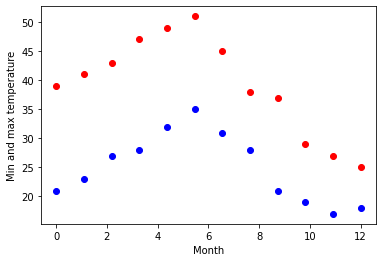

In [78]:

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.linspace(0,12,num=12)
plt.scatter(months, temp_max, c="red")
plt.scatter(months, temp_min, c="blue")
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

In [81]:
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = curve_fit(yearly_temps, months,
                                      temp_max, [20, 10, 0])
res_min, cov_min = curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

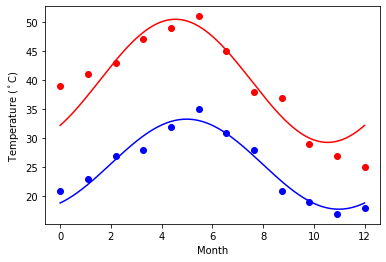

In [83]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()


In [143]:
df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [150]:
df["sex"].isnull().index
d_sex = df["sex"].dropna()
d_sex.isnull().sum()

0

In [146]:
gender = pd.Categorical(d_sex)
gender = gender.rename_categories([0,1])

([<matplotlib.patches.Wedge at 0x270fca7a390>,
 [Text(0.480836864838257, 0.9893411491555963, 'female'),
  Text(-0.4808369574670582, -0.9893411041363958, 'male')],
 [Text(0.26227465354814017, 0.5396406268121434, '35.6%'),
  Text(-0.2622747040729408, -0.5396406022562158, '64.4%')])

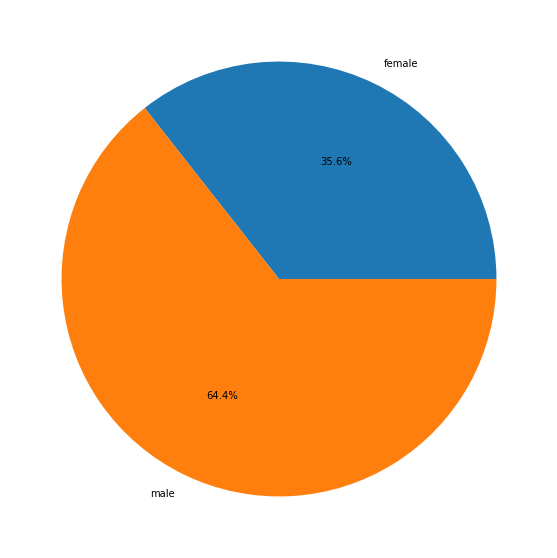

In [167]:
plt.figure(figsize=(10,10))
plt.pie(gender.value_counts(), labels = d_sex.unique(), autopct='%.1f%%')

In [134]:
df["fare"].isnull().sum()

2

In [135]:
df["age"].isnull().sum()

264

In [139]:
d_fare = df["fare"].fillna(value=df["fare"].mean())
d_fare.isnull().sum()

0

In [140]:
d_age = df["age"].fillna(value=df["age"].mean())
d_age.isnull().sum()

0

In [161]:
gen = df['sex'].astype('category')
gen = gen.cat.codes
gen.value_counts()

 1    843
 0    466
-1      1
dtype: int64

Text(0, 0.5, 'Fare')

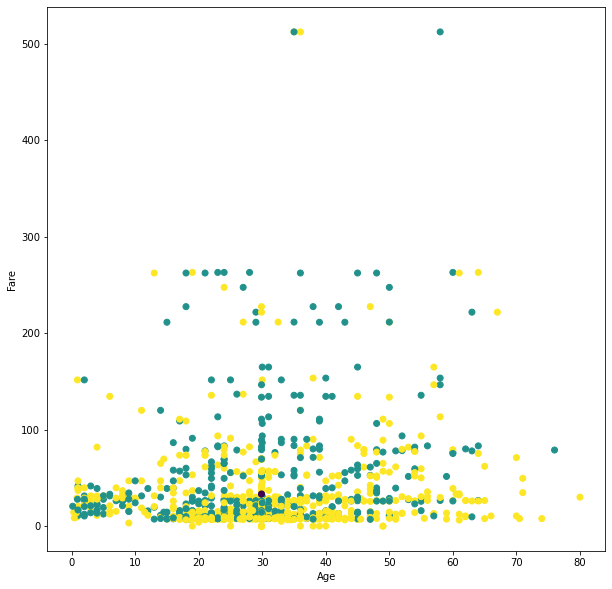

In [165]:
plt.figure(figsize=(10,10))
plt.scatter(d_age,d_fare,c=gen)
plt.xlabel("Age")
plt.ylabel("Fare")